In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# MEN SHOES

In [2]:
df_shoes = pd.read_csv('/work/MEN_SHOES.csv', sep=',', header=0)
df_shoes.head(2)

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
0,ASIAN,"2,242","₹1,098","Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8
1,ASIAN,240,₹674,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0


In [3]:
 df_shoes.info() #Check if there are null-data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23940 entries, 0 to 23939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       23940 non-null  object 
 1   How_Many_Sold    23940 non-null  object 
 2   Current_Price    23142 non-null  object 
 3   Product_details  23940 non-null  object 
 4   RATING           23940 non-null  float64
dtypes: float64(1), object(4)
memory usage: 935.3+ KB


In [4]:
#In which brands there are null-data
null_data = df_shoes[df_shoes.Current_Price.isnull()]
null_data.Brand_Name.unique()

array(['Puma', 'Sparx'], dtype=object)

In [5]:
puma = df_shoes[df_shoes.Brand_Name == 'Puma']
sparx = df_shoes[df_shoes.Brand_Name == 'Sparx']
puma.Current_Price.unique(), sparx.Current_Price.unique()

(array([nan], dtype=object),
 array(['₹880', '₹1,279', '₹1,199', nan, '₹637', '₹1,231', '₹849'],
       dtype=object))

In [6]:
# In Puma all current prices are nan, so they're not useful for my analysis and 
# in Sparx there are somethings as well.
df_shoes.dropna(inplace=True)

In [7]:
#Change dtype of How_many_Sold & Current_Price
df_shoes.How_Many_Sold = df_shoes.How_Many_Sold.apply(lambda x: int(x.replace(',', '')))
df_shoes.Current_Price = df_shoes.Current_Price.apply(lambda x: int(x.replace('₹', '').replace(',', '')))
df_shoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23142 entries, 0 to 23939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       23142 non-null  object 
 1   How_Many_Sold    23142 non-null  int64  
 2   Current_Price    23142 non-null  int64  
 3   Product_details  23142 non-null  object 
 4   RATING           23142 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ MB


In [8]:
#Sales Column: Q*price
df_shoes['Income_$'] = df_shoes.apply(lambda x: x['How_Many_Sold'] * x['Current_Price'], axis=1)

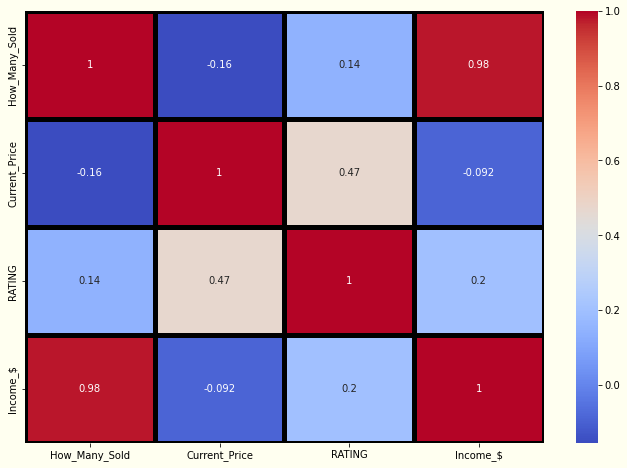

In [9]:
# Analyse the correlation between variables.
df_corr = df_shoes.corr()
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.5, 1.5])
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm', linewidth=5, linecolor='k')
fig.set_facecolor(color='#FFFFF0')
fig.show()

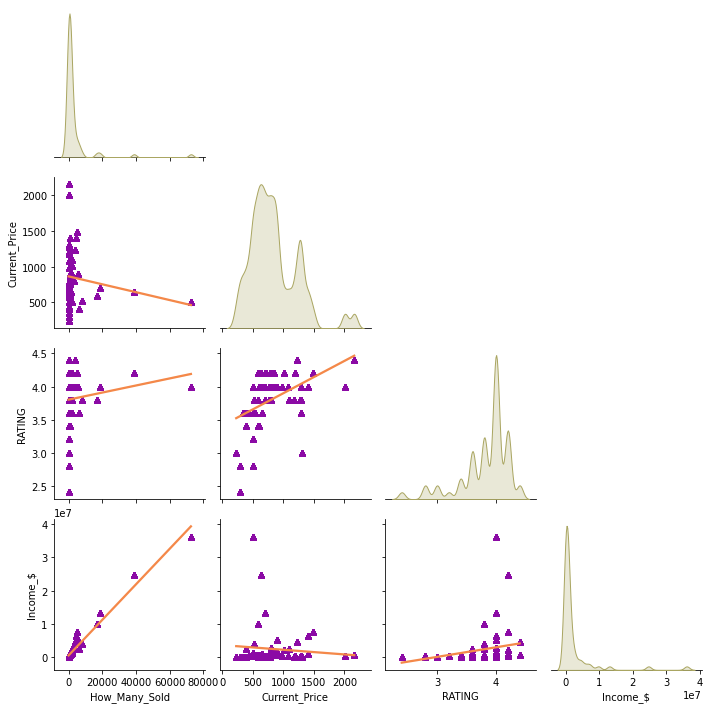

In [10]:
c_1, c_2 = sns.color_palette('plasma')[-2], sns.color_palette('plasma')[1]


sns.pairplot(data=df_shoes, corner=True, kind='reg', diag_kind='kde', diag_kws={'color': '#AAA662'}, 
plot_kws={'marker': '^', 'color': c_1, 'scatter_kws': {'color': c_2}})
plt.show()

---

## Top 5 brands with the highest sales & incomes

In [11]:
# The 5 brands with the highest number of shoes sold.
shoes_sold = df_shoes.groupby('Brand_Name').agg({'How_Many_Sold': 'sum'})
shoes_sold.sort_values('How_Many_Sold', ascending=False, inplace=True)
shoes_sold = shoes_sold[:5]
#The 5 brand with the highest income
income = df_shoes.pivot_table(index='Brand_Name', values='Income_$', aggfunc='sum')
income.sort_values('Income_$', ascending=False, inplace=True)
income = income[:5]

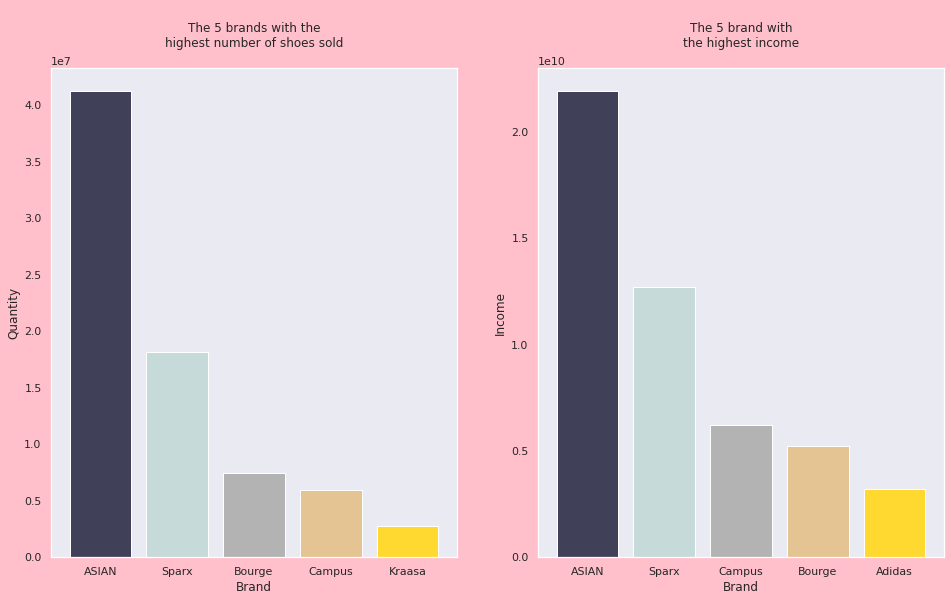

In [12]:
#Construct my palette
c_1, c_2 = sns.color_palette('bone')[1], sns.color_palette('bone', 5)[-1]
c_3, c_4 = sns.color_palette('Set2')[-1], sns.color_palette('Set2')[-2]
c_5 = sns.color_palette('Set2')[-3]
colors = [c_1, c_2, c_3, c_4, c_5]
#Graphic
sns.set_theme(style='dark')
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
#1
ax1.bar(data=shoes_sold, x=shoes_sold.index, height='How_Many_Sold', color=colors)
ax1.set_ylabel('Quantity')
ax1.set_xlabel('Brand')
ax1.set_title('\nThe 5 brands with the\nhighest number of shoes sold\n')
#2
ax2.bar(data=income, x=income.index, height='Income_$', color=colors)
ax2.set_title('\nThe 5 brand with\nthe highest income\n')
ax2.set_ylabel('Income')
ax2.set_xlabel('Brand')
fig.set_facecolor(color='#FFC0CB')
fig.show()

The vast majority of brands that sold the highest number of shoes are those that received the highest income as well. So there is a strong congruence in this relationship. But on the other hand, from here arises a new question: 

1.  Why did Adidas and Campus earn more income than Kraasa and Bourge respectively  if they sold fewer number of shoes? 

Well, let's find out the reason ...

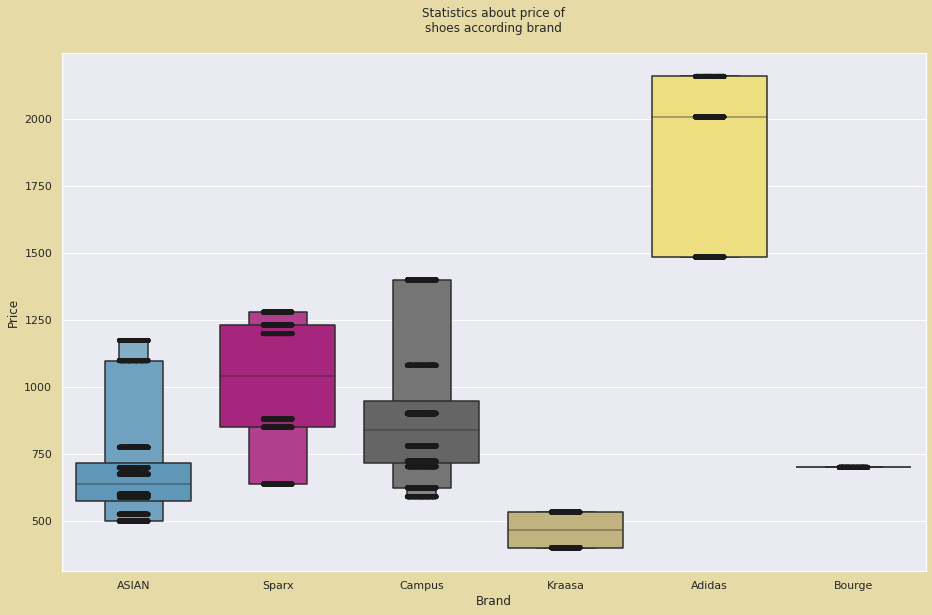

In [13]:
brands = list(income.index)
brands.append('Kraasa')
analysis = df_shoes[df_shoes.Brand_Name.isin(brands)]
#My palette
c_1, c_2 = sns.color_palette('PuBu')[-3], sns.color_palette('afmhot')[-2]
c_3, c_4 = sns.color_palette('afmhot')[1], sns.color_palette('RdPu')[-2]
c_5 = sns.color_palette('RdGy')[-1]
my_pltt = {x:'y' for x in analysis.Brand_Name.unique()}
my_pltt['ASIAN'], my_pltt['Adidas'], my_pltt['Campus'] = c_1, c_2, c_5
my_pltt['Sparx'], my_pltt['Bourge'] = c_4, c_3

#Graphic
sns.set_theme(style='darkgrid')
fig = plt.figure()
axes = fig.add_axes([0, 0, 2, 1.8])
sns.boxenplot(data=analysis, x='Brand_Name', y='Current_Price', palette=my_pltt)
sns.stripplot(data=analysis, x='Brand_Name', y='Current_Price', color='k')
axes.set_ylabel('Price')
axes.set_xlabel('Brand')
axes.set_title('Statistics about price of\nshoes according brand\n')
fig.set_facecolor(color='#E6DAA6')
fig.show()

In [14]:
#Statistics data
statistics_table = analysis.pivot_table(index='Brand_Name', values='Current_Price', aggfunc=('mean', 'median', 'max', 'min'))
statistics_table.reset_index(inplace=True)
statistics_table.columns = ['Brand', 'Max', 'Mean', 'Median', 'Min']
statistics_table.sort_values('Median', ascending=False, inplace=True)
statistics_table.index = np.arange(1, 7)
statistics_table['Mean'] = statistics_table.apply(lambda x: np.round(x.Mean, 2), axis=1)
statistics_table

,Brand,Max,Mean,Median,Min
1,Adidas,2159.0,1884.00,2008.0,1485.0
2,Sparx,1279.0,1012.50,1039.5,637.0
3,Campus,1399.0,897.92,840.0,590.0
4,Bourge,699.0,699.00,699.0,699.0
5,ASIAN,1173.0,699.75,636.5,498.0
6,Kraasa,532.0,465.50,465.5,399.0


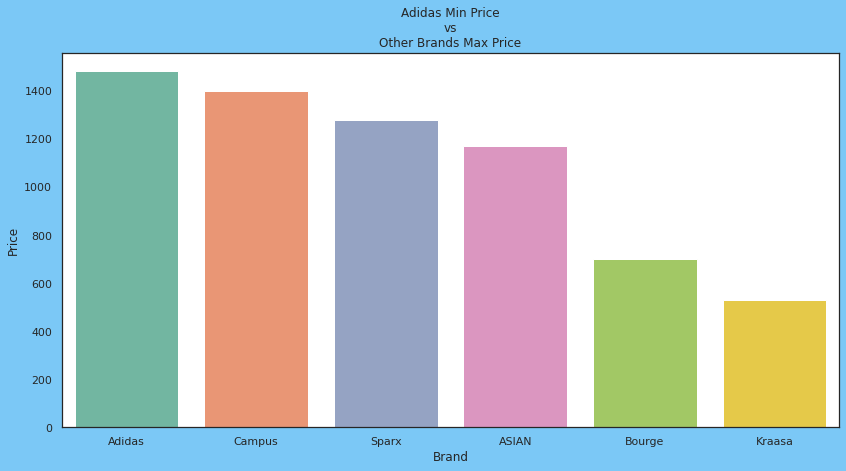

In [15]:
adidas = statistics_table.iloc[0, -1]
adidas = np.expand_dims(adidas, axis=0)
y = np.concatenate([statistics_table.loc[2:, 'Max'], adidas], axis=0)
df = pd.DataFrame({
    'Brand': ['Sparx', 'Campus', 'Bourge', 'ASIAN', 'Kraasa', 'Adidas'],
    'Price': y
})
df.sort_values('Price', ascending=False, inplace=True)

#Graphic
sns.set_theme(style='white')
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.8, 1.3])
sns.barplot(data=df, x='Brand', y='Price', palette='Set2')
axes.set_title('Adidas Min Price\nvs\nOther Brands Max Price')
fig.set_facecolor('#7BC8F6')
fig.show()

The reason's the following: Adidas has the highest median (p_50) and the highest average price per shoe among all brands. In addition, you can observe that the minimum price of its shoes is higher than any maximum price of any other brand. So despite having sold fewer shoes, this one managed to get higher income than Kraasa, which is the brand with the worst median and average price per shoe in this group and this can perfectly explain why it doesn't appear in the top 5 of brands with the highest income. And this same scenario is repeated between Campus and Bourge brands.

On the other hand, you can see that the ASIAN brand is the one that generated the most money and this is not due to the price of their shoes, but to the large amount they sold, since in reality their prices are relatively low compared to the other brands. And Sparx brand on its side is the most congruence, as it's the second brand with higher median, higher average price per shoe and number of shoes sold.   

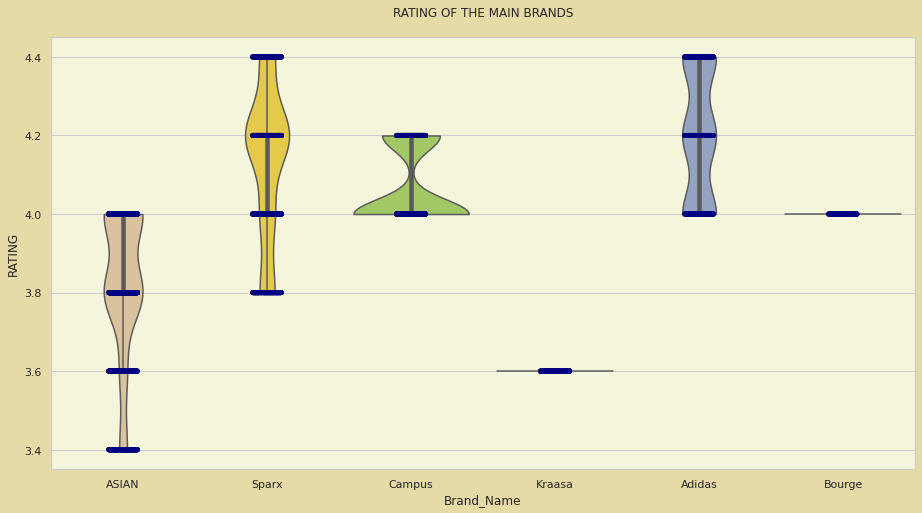

In [16]:
#Graphic
sns.set_theme(style='whitegrid')
fig = plt.figure()
axes = fig.add_axes([0, 0, 2, 1.5])
sns.violinplot(data=analysis, x='Brand_Name', y='RATING', bw=0.4, cut=0, palette='Set2_r')
sns.stripplot(data=analysis, x='Brand_Name', y='RATING', color='#000080')
axes.set_facecolor(color='#F5F5DC')
axes.set_title('RATING OF THE MAIN BRANDS\n')
fig.set_facecolor(color='#E6DAA6')
fig.show()

#Table
table = analysis.pivot_table(index='Brand_Name', values='RATING', 
                            aggfunc=('mean', 'max', 'min', 'median'))
table.columns = ['Max', 'Mean', 'Median', 'Min']
table['Mean'] = table.apply(lambda x: np.round(x.Mean, 2), axis=1)
table.sort_values('Mean', ascending=False, inplace=True)

In [17]:
table

,Max,Mean,Median,Min
Brand_Name,,,,
Adidas,4.4,4.20,4.2,4.0
Sparx,4.4,4.13,4.2,3.8
Campus,4.2,4.07,4.0,4.0
Bourge,4.0,4.00,4.0,4.0
ASIAN,4.0,3.83,3.8,3.4
Kraasa,3.6,3.60,3.6,3.6


Adidas occupies the first place in this analysis and with this proves to be the footwear brand of that generates the most satisfaction among its customers, thus achieving a balance between price and quality.  And on the other hand, It can be observed that although ASIAN is the brand with the the highest sales and revenues, It's not the best valued and a probable reason for this may be its low prices, since its normal that when a product is cheap its quality isn't so good and this causes that the customers value it low.

In adittion , Sparx can be considered the brand with the best statistics of all brands, since It's the second one with the highest sales, revenues and valoration.   

---

## The most popular type of shoe

In [19]:
#Check the most repeated words 
arr_details = df_shoes.Product_details.unique()
dict = {}
counter = 0
for element in arr_details:
    element = element.strip().replace(',', ' ')
    dict[counter] = element.split(' ')
    counter += 1

words = set()
for word in dict.values():
    words.update(word)
words

{'',
 '&',
 '(N)',
 '(O-5033)',
 '2.0',
 '21',
 '5631',
 'Ankle',
 'B.R.K.',
 'Badminton',
 'Best',
 'Black',
 "Boy's",
 'Brazil',
 'Bull',
 'Canvas',
 'Casual',
 "Casual-Men's",
 'Century-12',
 'Color-Light',
 'Comfortable',
 'Cosko',
 'Cushion',
 'Delta-20',
 'Denim',
 'Dress',
 'Eva',
 'Express-08',
 'Extra',
 'Fahion',
 'Fashion',
 'First',
 'Flash',
 'Formal',
 'Glide',
 'Grey',
 'Gym',
 'Gyming',
 'HARVEL',
 'Harrow',
 'Hattrick-27',
 'INNOVA-04',
 'Jump',
 'Jung',
 'Knitted',
 'Lace',
 'Lace-Up',
 'Lace-Ups',
 'Latest',
 'Leather',
 'Light',
 'Lightweight',
 'Loire-z1',
 'Low',
 'Lp',
 'M',
 'MEN-2010',
 'Max',
 'Men',
 "Men's",
 'Men-9064',
 'Mens',
 'Mesh',
 'Mike',
 'Nexon',
 'Office',
 'On',
 'Oslo',
 'Outdoors',
 'Outwear',
 'Oxygen',
 'Oxygen-01',
 'PRO',
 'Plasma-08',
 'Rates',
 'Red',
 'Runner',
 'Running',
 'Running/Walking/Gym/Sports',
 'S-Cross',
 'SM-661',
 'Sd0323g',
 'Shoe',
 'Shoes',
 'Skadi',
 'Slip',
 'Slip-On',
 'Sm-648',
 'Sm-677',
 'Sm-680',
 'Sneaker',
 'Sne

In [20]:
df_copy = df_shoes.copy()
def shoe(type_s): #type_s  = Type of shoe
    ser_bool = df_shoes.Product_details.str.contains(type_s)
    return ser_bool # Pandas Series whose elements are of type bool

#Figure out which shoes are sport ones.
sports = shoe('Sports')*1
running = shoe('Run')*1
sneaker = shoe('Sneaker')*1
walking = shoe('Walking')*1
badminton = shoe('Badminton')*1

df_copy['Sports'], df_copy['Run'], df_copy['Sneaker'] = sports, running, sneaker
df_copy['Walking'], df_copy['Badminton'] = walking, badminton
df_copy['Sport'] = df_copy.apply(lambda x: x.Sports+x.Run+x.Sneaker+x.Walking+x.Badminton, axis=1)
df_copy.drop(['Sports','Run', 'Sneaker', 'Walking', 'Badminton'], axis=1, inplace=True)
df_copy['Sport'] = df_copy.Sport.apply(lambda x: 1 if x > 0 else 0)
sports_shoe = df_copy[df_copy.Sport == 1]

#Nivia's the unique brand that sell badminton shoes.badminton.
#Sport shoes: Walking 6 | Running 15 | Sneakers 5

In [21]:
#Figure out which shoes are formal ones.
formal = shoe('Formal')*1
office = shoe('Office')*1
df_copy['Formal'], df_copy['Office'] = formal, office
df_copy['Formal_s'] = df_copy.apply(lambda x: 1 if (x.Formal + x.Office) > 0 else 0, axis=1)
df_copy.drop(['Formal', 'Office'], axis=1, inplace=True)
formal_s = df_copy[df_copy.Formal_s == 1]

In [22]:
cond_1 = df_copy.Sport != 1
cond_2 = df_copy.Formal_s != 1
other = df_copy[cond_1 & cond_2]
# This type of shoes are sport, only that its product details didn't have
# the key words ('Run', 'Walking', 'Sneaker', 'Badminton') :
adidas_shoes = other[other.Product_details == "Men's Skadi Shoes  "].index
casual_shoes = other[other.Product_details != "Men's Skadi Shoes  "].index

In [23]:
df_shoes['Type_shoe'] = np.nan
df_shoes.loc[sports_shoe.index, 'Type_shoe'] = 'Sport'
df_shoes.loc[formal_s.index, 'Type_shoe'] = 'Formal'
df_shoes.loc[adidas_shoes, 'Type_shoe'] = 'Sport'
df_shoes.loc[casual_shoes, 'Type_shoe'] = 'Casual'

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


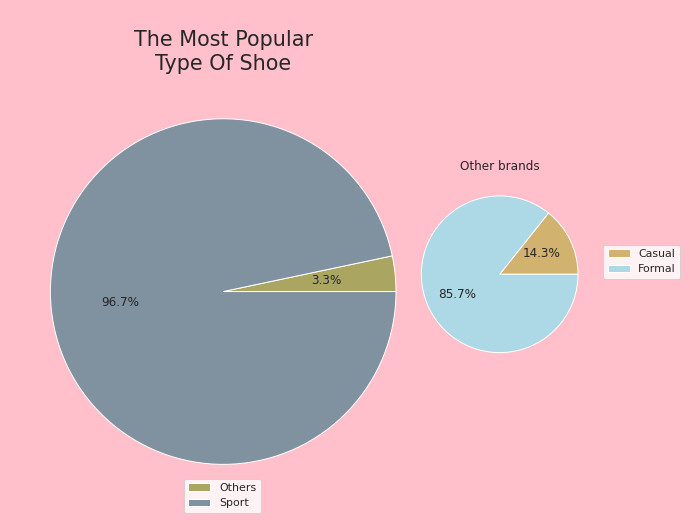

In [24]:
#Average price
avg_price_rating = df_shoes.pivot_table(index='Type_shoe', aggfunc=({'Current_Price': 'mean', 'RATING': 'mean'}))
avg_price_rating['Current_Price'] = avg_price_rating.Current_Price.apply(lambda x: np.round(x, 2))
avg_price_rating['RATING'] = avg_price_rating.RATING.apply(lambda x: np.round(x, 2))
avg_price_rating.sort_values('Current_Price', ascending=False, inplace=True)

#Sports and Others
sport_shoe = df_shoes.copy()
sport_shoe.loc[sport_shoe.Type_shoe != 'Sport', 'Type_shoe'] = 'Others'
table_1 = sport_shoe.pivot_table(index='Type_shoe', aggfunc=({'How_Many_Sold': 'sum'}))

#Others: Casual vs Formal
others_shoe = df_shoes.copy()
other_shoe = others_shoe[others_shoe.Type_shoe != 'Sport']
table_2 = other_shoe.pivot_table(index='Type_shoe', aggfunc={'How_Many_Sold': 'sum'})

#Color
c_1 = sns.color_palette('bone')[3]
#Graphic
fig = plt.figure()
#1
ax1 = fig.add_axes([0, 0, 1.5, 1.5])
ax1.pie(data=table_1, x='How_Many_Sold', colors=('#AAA662', c_1), autopct='%0.1f%%')
ax1.legend(labels=table_1.index, bbox_to_anchor=(0.6, 0.08))
# ax1.set_facecolor(color='#')
ax1.set_title('\nThe Most Popular\nType Of Shoe', fontdict={'fontsize': 'xx-large', 'family': 'cursive'})
#2
ax2 = fig.add_axes([1.05, 0.47, 0.68, 0.68])
ax2.pie(data=table_2, x='How_Many_Sold', autopct='%.1f%%', colors=('#D1B26F', '#ADD8E6'))
ax2.legend(labels=table_2.index, bbox_to_anchor=(1, 0.68))
ax2.set_title('Other brands')
fig.set_facecolor(color='#FFC0CB')
fig.show()

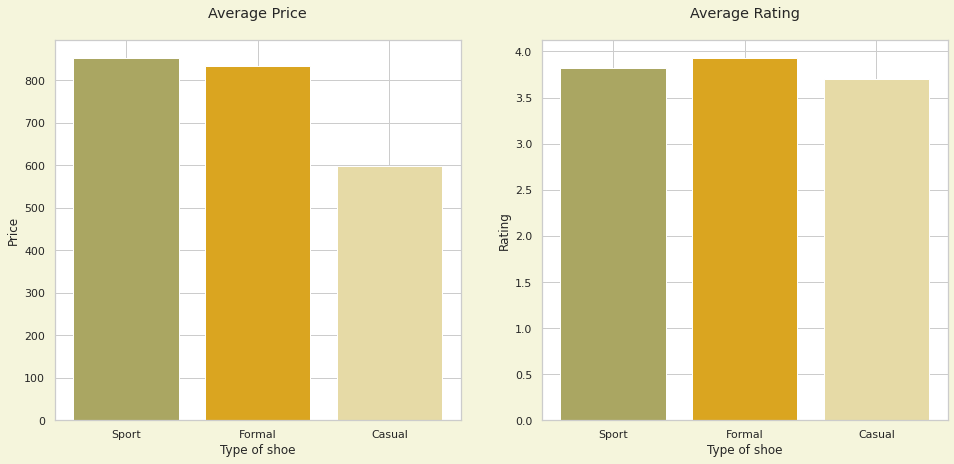

In [25]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
#1
ax1.bar(data=avg_price_rating, x=avg_price_rating.index, height='Current_Price', color=('#AAA662', '#DAA520', '#E6DAA6'))
ax1.set_ylabel('Price'), ax1.set_xlabel('Type of shoe')
ax1.set_title('Average Price\n', fontdict={'fontsize': 'large'})
#2
ax2.bar(data=avg_price_rating, x=avg_price_rating.index, height='RATING',  color=('#AAA662', '#DAA520', '#E6DAA6'))
ax2.set_ylabel('Rating'), ax2.set_xlabel('Type of shoe')
ax2.set_title('Average Rating\n', fontdict={'fontsize': 'large'})
fig.set_facecolor(color='#F5F5DC')
fig.show()

The most popular type of shoe in men is the sporty one and you can observe a very marked difference with respect to the others. And this is normal to happen, as they're more comfortable and can be used  on many occasions. On the other hand, in the 'Others' section it can be observed that the formal shoes had higher sales than casual ones.

And about average price and rating, it can be seen that the sports shoes were the ones that had the highest price and the casual ones the cheapest, but the first one despite having been the one that has the highest sales and average price is not the best valued for customers, since this place is taken by formal shoes. 

---

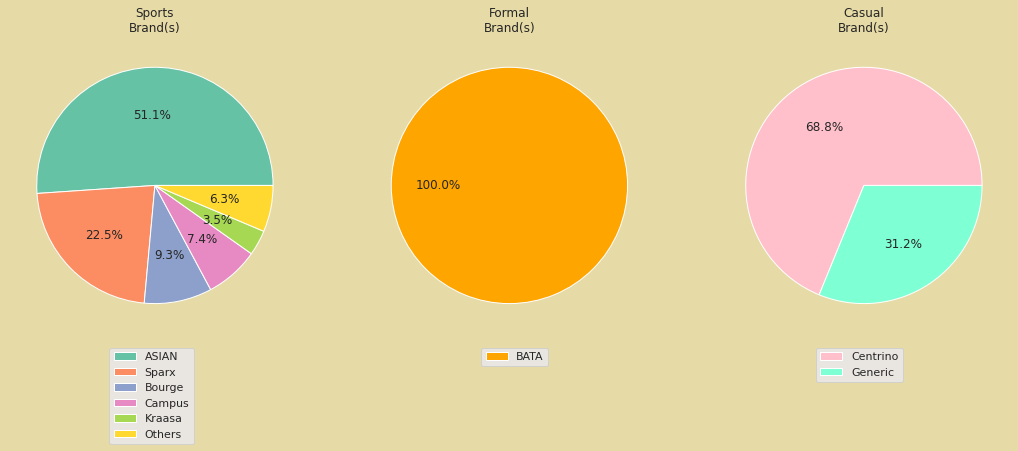

In [26]:
#Pie chart about distribution of Sport, Casual and Formal
# This allows me to understand which brands what type of shoe sell each one.
#Sport
sport_shoe = df_shoes.loc[df_shoes.Type_shoe == 'Sport',['Brand_Name', 'How_Many_Sold']]
sport_shoe = sport_shoe.pivot_table(index='Brand_Name', aggfunc=({'How_Many_Sold': 'sum'}))
sport_shoe.sort_values('How_Many_Sold', ascending=False, inplace=True)
df_sport = pd.DataFrame({
    'Sales': sport_shoe.How_Many_Sold[0:5]
}, index=sport_shoe.index[0:5])

df_other_brands = pd.DataFrame({
    'Sales': sport_shoe.How_Many_Sold[5:].sum()
}, index=['Others'])

df_sport = pd.concat([df_sport, df_other_brands], axis=0)

#Formal
formal_shoe = df_shoes[df_shoes.Type_shoe == 'Formal']
formal_shoe = formal_shoe.pivot_table(index='Brand_Name', aggfunc=({'How_Many_Sold': 'sum'}))

#Casual
casual_shoe = df_shoes[df_shoes.Type_shoe == 'Casual']
casual_shoe = casual_shoe.pivot_table(index='Brand_Name', aggfunc=({'How_Many_Sold': 'sum'}))

#Graphic
#Palette
palette = sns.color_palette('Set2', 6)
#Graphic
sns.set_theme(style='dark')
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(18, 18))
#1
ax1.pie(data=df_sport, x='Sales', autopct="%0.1f%%", colors=palette)
ax1.legend(labels=df_sport.index, bbox_to_anchor=(0.65, -0.03))
ax1.set_title('Sports\nBrand(s)')
#2
ax2.pie(data=formal_shoe, x='How_Many_Sold', autopct='%.1f%%', colors=['#FFA500'])
ax2.legend(labels=formal_shoe.index, bbox_to_anchor=(0.65, -0.03))
ax2.set_title('Formal\nBrand(s)')
#3
ax3.pie(data=casual_shoe, x='How_Many_Sold', autopct='%.1f%%', colors=['#FFC0CB', '#7FFFD4'])
ax3.legend(labels=casual_shoe.index, bbox_to_anchor=(0.65, -0.03))
ax3.set_title('Casual\nBrand(s)')
fig.set_facecolor(color='#E6DAA6')
fig.show()

In [27]:
total_brands = df_shoes.Brand_Name.unique().shape[0]
sport_brands = sport_shoe.index.shape[0]
percentage = sport_brands/total_brands
print(f'How many brands sell sport shoes?: {sport_brands} brands.')
print(f'{percentage*100}% of brands sell sporty shoes.')

How many brands sell sport shoes?: 18 brands.
90.0% of brands sell sporty shoes.


* As expected, the vast majority of brands sell sporty shoes, with 90% of them.
* Bata is the unique brand that sell formal shoes for mens.
* Centrino and Generic are the ones that sell casual shoes and the one that got the highest sales was the first one.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d8863108-e942-4640-b939-6276ffcaa0bb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>